<a href="https://github.com/conordewey3/HitchhikersGuideMachineLearning/blob/master/Hitchhiker's%20Guide%20to%20Machine%20Learning%20Algorithms%20in%20Python.ipynb"> ссылка </a> 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [32]:
from openpyxl import load_workbook

In [34]:

from sklearn import linear_model
df = pd.read_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx')
df.columns = ['X', 'Y', 'z']
df.head(10)

,X,Y,z
0,108,392.5,1
1,19,46.2,2
2,13,200.0,3
3,124,422.2,4
4,40,119.4,5
5,55,88.0,6
6,70,300.0,7
7,100,400.0,8


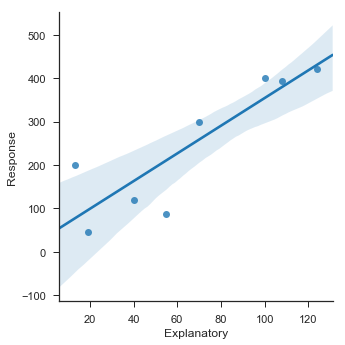

In [35]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

# some manipulations made with the data as a dictionary 

In [36]:
print(df['X'])
df1 = pd.DataFrame({ 'A' : 1.,
                     'B' : (df['Y']) + 10,
                     'C' : df['z'], 
                     'D' : df['X'] })
print (df1)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C    D
0  1.0  402.5  1  108
1  1.0   56.2  2   19
2  1.0  210.0  3   13
3  1.0  432.2  4  124
4  1.0  129.4  5   40
5  1.0   98.0  6   55
6  1.0  310.0  7   70
7  1.0  410.0  8  100


In [37]:
print(df['X'])

'''
l =[]
print(d)
for i in df['X']:
    i = str(i) + "_01"
    l.append(i)'''
df['X'] = [str(i) + "_01" for i in df['X']]

df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : df['Y'] + 10,
                     'C' : df['z'],
                     'D' : df['X'] })
print (df3)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C       D
0  1.0  402.5  1  108_01
1  1.0   56.2  2   19_01
2  1.0  210.0  3   13_01
3  1.0  432.2  4  124_01
4  1.0  129.4  5   40_01
5  1.0   98.0  6   55_01
6  1.0  310.0  7   70_01
7  1.0  410.0  8  100_01


# file writing

In [38]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:\\Users\E277460\PycharmProjects\Jupyter\linear_regression_df1.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df3.to_excel(writer, sheet_name='Sheet2')


# Close the Pandas Excel writer and output the Excel file.
writer.save()


# addind data into the existing sheet

In [39]:
file2 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx'
df5 = pd.DataFrame({ 'X' : 2.,
                     'Y' : (df['Y']) + 1000 })
df5.shape[0]   ## Gives no. of rows/records  or len(df) or len(df.index)
df.shape[1]   ## Gives no. of columns
curr_count = df5.shape[0]
writer2 = pd.ExcelWriter(file2, engine='openpyxl')

df3.to_excel(writer2, index=False)    

df5.to_excel(writer2, startrow=curr_count + 1, index=False)

writer2.save()

# addind data into a new sheet of the existing sheet

In [40]:
file = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx'

df4 = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
book = load_workbook(file)
writer = pd.ExcelWriter(file, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data
df4.to_excel(writer, sheet_name='New', index=None)
writer.save()